# TP1 PROBA : NOTEBOOK DE TEST DES GENERATEURS ALEATOIRES
**B3330**  
**CHAPELLE Victoire**  
**SOTIR Paul-emmanuel**  

Ce TP a pour objectif de nous introduire dans un premier temps à la génération de nombre aléeatoire et surtout aux outils statistiques nous permettant d'évaluer la qualité de cette génération.

Le rapport de ce TP est sous forme de notebook python3 permettant de simplifier la rédaction du rapport et de mieux lier l'éxecutable au rapport (il suffit de réexecuter le notebook pour visualiser les résultats pour une autre execution).

In [1]:
import ResultAnalysis as ra
from ggplot import *
import numpy as np
import pandas as pd
import subprocess
%matplotlib inline

path = '..\\'

Le programme C du TP génère 1024 valeurs aléatoires pour chaque générateur aléatoires (AES, Rand(), Von Neumann et Mersenne-Twister) qui sont enregistrées dans des fichiers csv. Il effectue également le test de fréquence monobit et des runs puis enregistre les résultats (p-valeurs obtenues pour chaque générateurs) dans un fichier CSV.

Executons le programme :

In [2]:
# Run C random value generators
from io import StringIO
p = subprocess.Popen(path + 'RandomGenerators\\simul.exe', stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
output, err = p.communicate()
print(output.decode("utf-8"))

Temps d'execution du calcul de 3000 valeurs de la distribution f (inversion): 2498 us
Temps d'execution du calcul de 3000 valeurs de la distribution f (rejet): 42371 us



### Simulation de distributions
Le programme affiche en sortie standard le temps d'execution de 3000 executions de deux fonctions simulant la distribution d'une même fonction f par deux méthodes différentes : par inversion et par rejet. Voici la fonction f pour x compris entre 0 et 1 :
$$f(x)=\frac{2}{\ln(2)^{2}}\frac{\ln{(1 + x)}}{1 + x}$$

On constate que l'inversion donne un résultat plus rapide mais elle est plus difficile à mettre en place pour une distribution quelconque puisqu'il faut connaitre la fonction inverse.  
Voici les distributions de f obtenues pour 3000 valeurs issues des deux méthodes (rejet et inversion) :

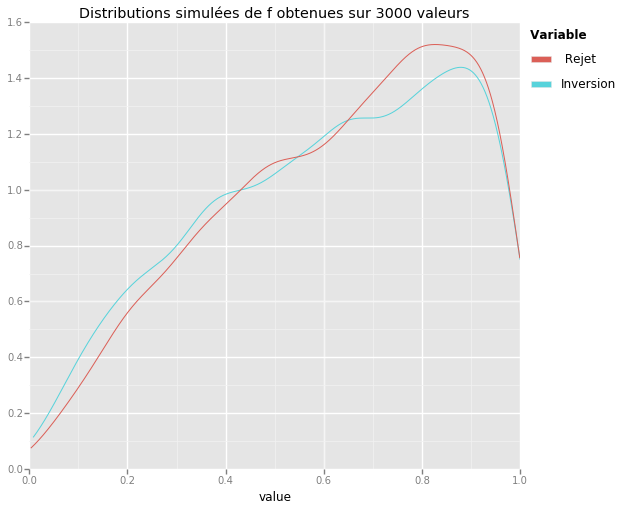

<ggplot: (14551065)>

In [3]:
distrib_f = pd.read_csv(path + '_distributions_f.csv', quoting = 2)
# Affichage de la P - valeur pour le test des runs(la ligne noire horizontale indique la limite des 0.01)
ggplot(pd.melt(distrib_f), aes(x = 'value', color = 'variable')) + geom_density() \
    + ggtitle("Distributions simulées de f obtenues sur 3000 valeurs")


D'autres distributions ont été implémentées dans le programme C (pas montrées ici). Ces distributions sont disponnibles dans le fichier 'lois_distributions.h' : Alea() réalise une loi uniforme sur [0;1], Exponentielle(lambda) réalise une distribution exponentielle, Gauss(sigma, m) réalise une loi de Gauss (loi normale) et f_inversion()/f_rejet() réalisent la loi de distribution f.

## Visualisation des valeures générée par Rand()

Visualiser la distributions des valeures alétoires permet de rappidement juger d'un générateur de valeures aléatoires.  
Nous visualison ici l'hitogramme des veleures aléatoires. Nous avons également réalisé un test spectrale (issu de NIST) qui est simplement la visualisation de la transformée de fourier de la séquence de bits aléatoires générée (réalisé en python dans le fichier ResultAnalysis.py). Ce spectre est censé être uniforme, tout comme l'histogramme.

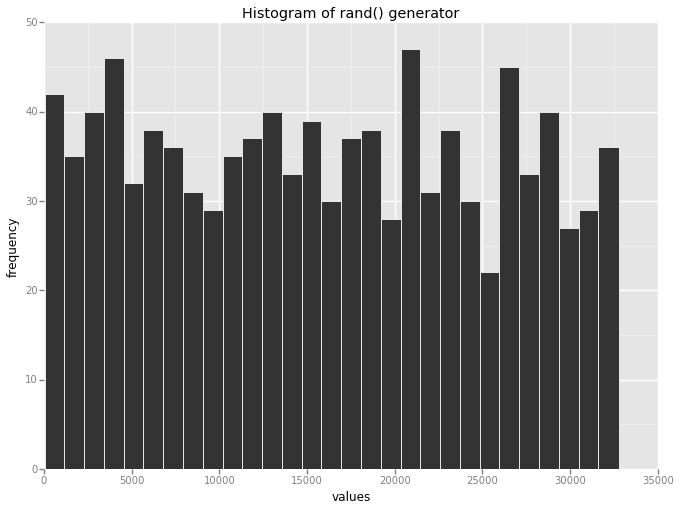

<ggplot: (14600913)>


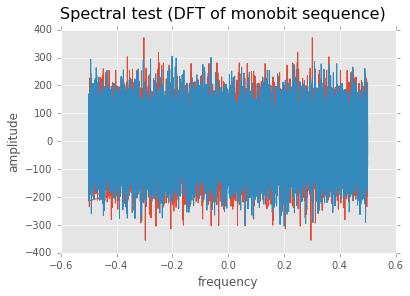

In [4]:
# Plot Histogram of rand() generator
data_rand = pd.read_csv(path + '_rand.csv', quoting=2)
print(ggplot(aes(x='values'), data=data_rand) + geom_histogram(binwidth = ra.width(data_rand, 30)) \
        + ggtitle("Histogram of rand() generator") + labs("values", "frequency"))
# Plot FFT of bit sequence from rand() generator
ra.plot_bit_sequence_fft(data_rand['values'], 15)

### Visualisation des valeures générée pour les 4 bits de poids fort de rand()

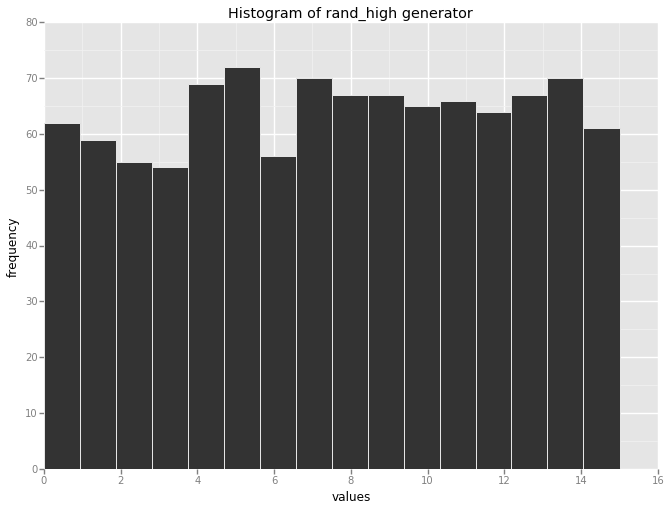

<ggplot: (14863779)>


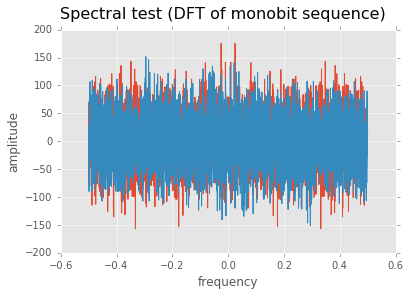

In [5]:
# Plot Histogram of rand_high generator
data_rand_high = pd.read_csv(path + '_rand_high.csv', quoting=2)
print(ggplot(aes(x='values'), data=data_rand_high) + geom_histogram(binwidth = ra.width(data_rand_high, 16)) \
        + ggtitle("Histogram of rand_high generator") + labs("values", "frequency"))
# Plot FFT of bit sequence from rand_high generator
ra.plot_bit_sequence_fft(data_rand_high['values'], 4)

### Visualisation des valeures générée pour les 4 bits de poids faible de rand()

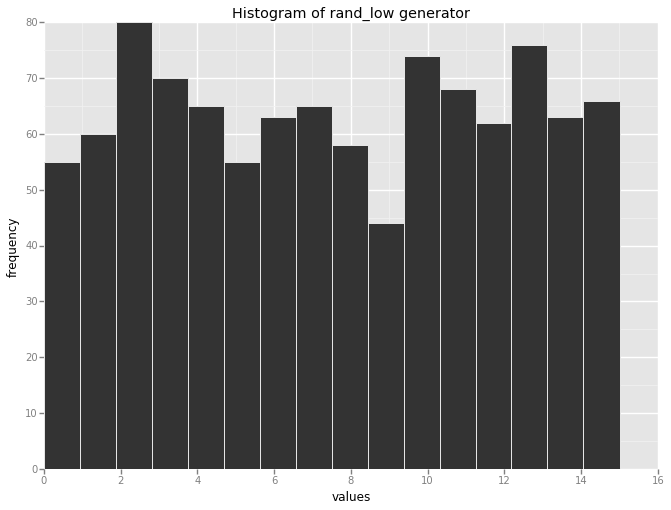

<ggplot: (15365809)>


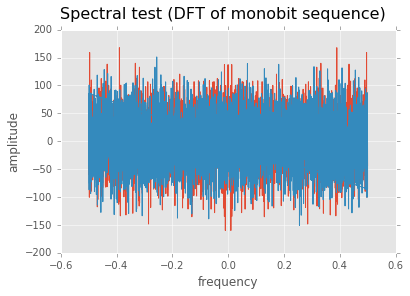

In [6]:
# Plot Histogram of rand_low generator
data_rand_low = pd.read_csv(path + '_rand_low.csv', quoting=2)
print(ggplot(aes(x='values'), data=data_rand_low) + geom_histogram(binwidth = ra.width(data_rand_low, 16)) \
      + ggtitle("Histogram of rand_low generator") + labs("values", "frequency"))
# Plot FFT of bit sequence from rand_low generators
ra.plot_bit_sequence_fft(data_rand_low['values'], 4)

## Visualisation des valeures générée par la méthode AES

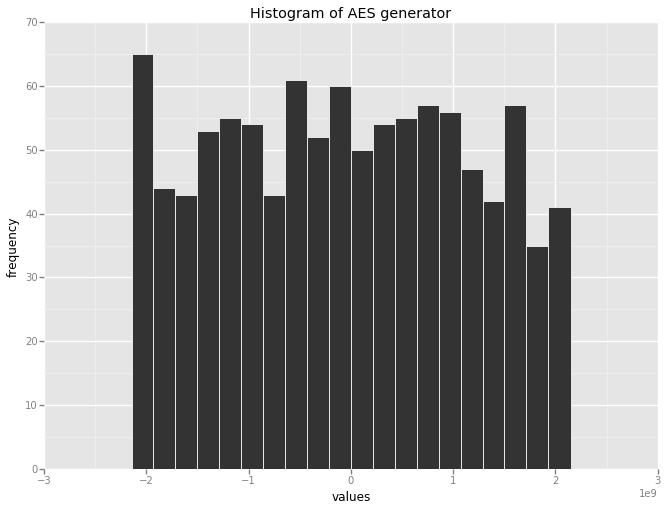

<ggplot: (15407829)>


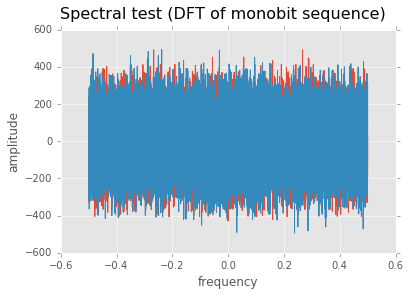

In [7]:
# Plot Histogram of AES generator
data_aes = pd.read_csv(path + '_aes.csv', quoting=2)
print(ggplot(aes(x='values'), data=data_aes) + geom_histogram(binwidth = ra.width(data_aes, 20)) \
      + ggtitle("Histogram of AES generator") + labs("values", "frequency"))
# Plot FFT of bit sequence from AES generator
ra.plot_bit_sequence_fft(data_aes['values'], 31)

## Visualisation des valeures générée par la méthode de  Mersenne-Twister

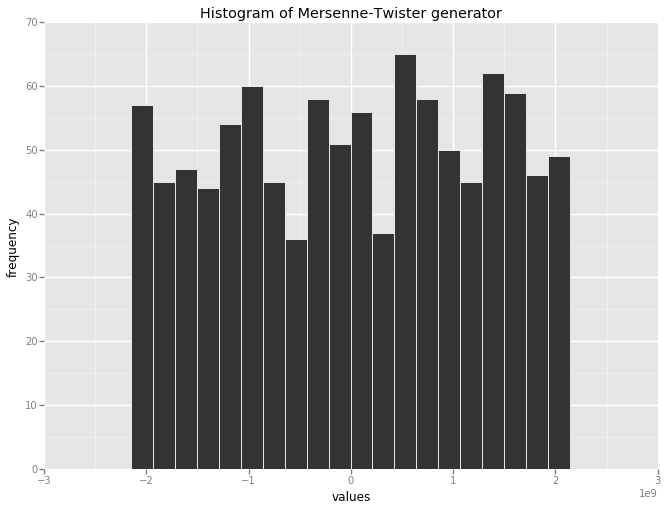

<ggplot: (15391409)>


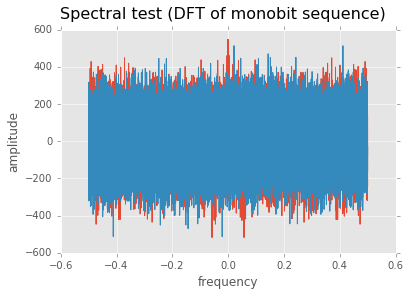

In [8]:
# Plot Histogram of Mersenne-Twister generator
data_twister = pd.read_csv(path + '_twister.csv', quoting=2)
print(ggplot(aes(x='values'), data=data_twister) + geom_histogram(binwidth = ra.width(data_twister, 20)) \
      + ggtitle("Histogram of Mersenne-Twister generator") + labs("values", "frequency"))
# Plot FFT of bit sequence from Mersenne-Twister generator
ra.plot_bit_sequence_fft(data_twister['values'], 31)

## Visualisation des valeures générée par la méthode de Von Neumann

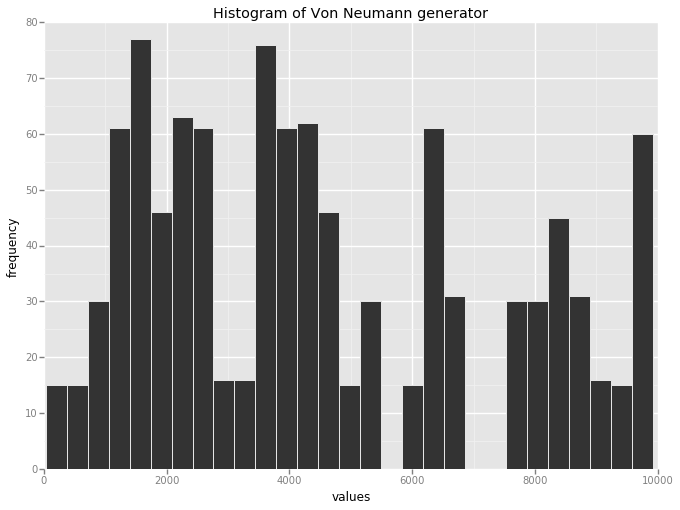

<ggplot: (14577955)>


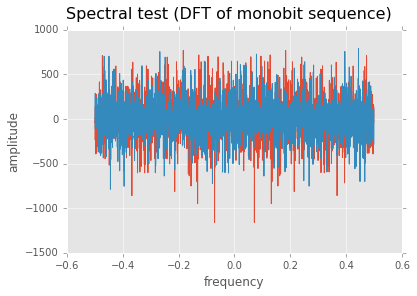

In [9]:
# Plot Histogram of Von Neumann generator
data_neumann = pd.read_csv(path + '_von_neumann.csv', quoting=2)
print(ggplot(aes(x='values'), data=data_neumann) + geom_histogram(binwidth = ra.width(data_neumann, 30)) \
      + ggtitle("Histogram of Von Neumann generator") + labs("values", "frequency"))
# Plot FFT of bit sequence from Von Neumann generator
ra.plot_bit_sequence_fft(data_neumann['values'], 14)

On constate que ce générateur de valeurs alétoires n'est pas trés efficace par rappport aux précédents. La transformée de fourier discrete de la séquence de bits générée est assez irrégulière et l'histogramme montre bien que la répartition des valeures aléatoire sur l'interval [0;10000] n'est pas uniforme.

## Résultats des tests de runs et de fréquence monobit

Le programme C execute les tests de runs et de fréquence monobit pour chaque générateurs de valeurs aléatoires. Voici la visualisation des 25 p-valeurs (25 répétition de ces tests) issues de chaque tests :

In [10]:
# Lecture des résultats des tests sur les générateurs aléatoires
tests_results = pd.read_csv(path + '_test_results.csv', quoting=2)
tests_results['index'] = list(range(len(tests_results.index)))
tests_results = tests_results.reset_index()
tests_results.columns = ['generator', 'Monobit p-value', 'frequency', 'Runs p-value', 'index']

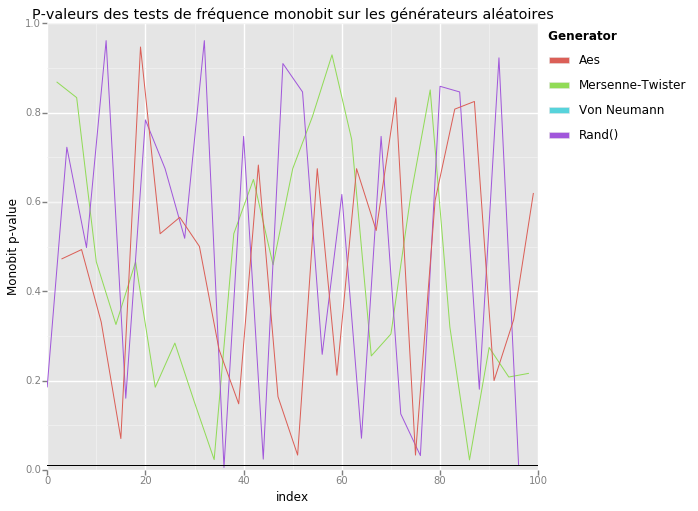

<ggplot: (15364729)>

In [11]:
# Affichage de la P-valeur pour le test des fréquence monobit (la ligne noire horizontale indique la limite des 0.01)
ggplot(tests_results, aes(x='index', y='Monobit p-value', color='generator')) + geom_line() \
    + geom_abline(intercept=0.01, slope= 0, color="black") \
    + ggtitle("P-valeurs des tests de fréquence monobit sur les générateurs aléatoires")

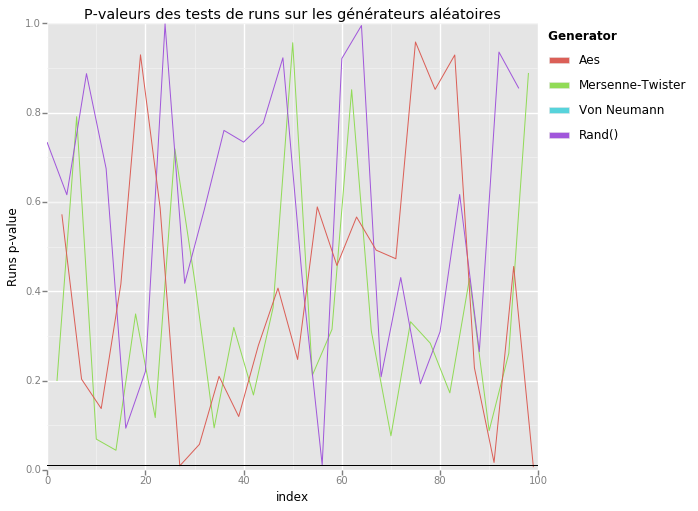

<ggplot: (15822261)>

In [12]:
# Affichage de la P-valeur pour le test des runs (la ligne noire horizontale indique la limite des 0.01)
ggplot(tests_results, aes(x='index', y='Runs p-value', color='generator')) + geom_line() \
    + geom_abline(intercept=0.01, slope= 0, color="black") \
    + ggtitle("P-valeurs des tests de runs sur les générateurs aléatoires")

On constate que tout les générateurs alétoires sont au dessus de la barre des 0.01 mis à part Von Neumann (sa p-valeur est toujours à 0) pour les deux tests.

## Files d'attente M/M/1
On s'interesse à l'évolution d'une file d'attente FIFO régie par des lois de probablitées exponentielles. L'unité de temps utilisée est la minute.  
Tous d'abord on génère les arrivées et départs de la file d'attente sachant qu'une seule requette (arrivée) ne peut être traitée en même temps et que les temps de traitement les instants d'arrivée sont régies par deux lois exponentielles de paramètres $\lambda =\frac{12}{60}$ et $\mu =\frac{20}{60}$.

### Nombre moyen de client dans le système et temps moyen de présence

On veux évaluer le nombre moyen de requettes/clients dans le système et le temps moyen d'attente d'une requette/client dans la file. Le programme C calcule ces valeurs à partir de l'évolution et de la file d'attente et affiche les résultats dans la sortie standard si une option/argument est donné au programme ('--list'). Executons le programme C avec cette option : 

In [38]:
# Execute le programme pour generer une réalisation d'une file mm1 (en autre)
from io import StringIO
p = subprocess.Popen(path + 'RandomGenerators\\simul.exe --list', \
                     stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
output, err = p.communicate()
print(output.decode("utf-8"))

Nombre moyen de clients dans la file : E(N) = 4.388296 clients
Temps moyen de présence d'un client dans la file : E(W) = 18.369611 min
D'ou, lambda * E(W) = 3.673922



On constate que $\lambda * E(W)$ est toujours relativement proche de  de $E(N)$ ce qui tend à vérifier la formule de little (il faudrais cependant aller plus loin et calculer des p-valeurs pour mieux en juger).

### Files d'attente générées et évolution de celles-ci
Voici les arrivées et départs générés définisant la file d'attente sur une durée de 3 heures :

In [39]:
file_mm1 = pd.read_csv(path + '_file_mm1.csv', quoting=2)
file_mm1

,arrivee,depart
0,6.569204,7.058321
1,14.884682,24.133570
2,25.825341,30.467784
3,26.784067,32.120745
4,28.145136,33.682400
5,29.688515,34.524342
6,32.731360,43.384051
7,35.315343,52.691137
8,37.227514,52.841893
9,38.538978,53.858904


On en déduit l'évolution de cette file d'attente. Cette évolution est mise à jour pour chaque instants présents dans le tableau ci-dessus ce qui donne l'évolution du nombre de clients dans la file d'attente donnée ci-dessous :

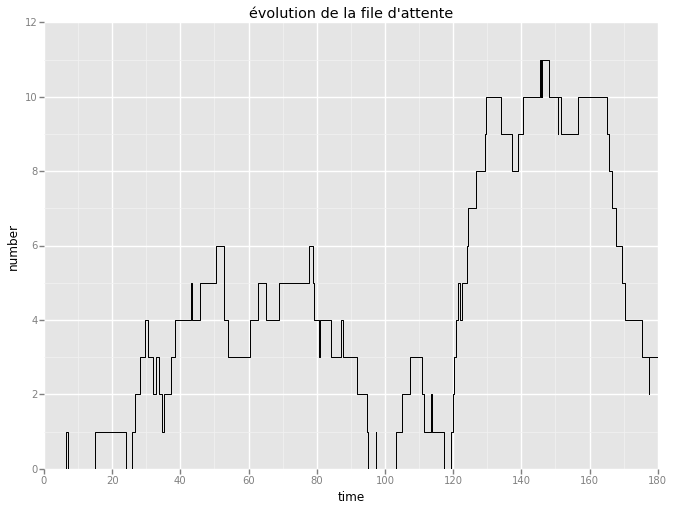

<ggplot: (15735893)>

In [40]:
# Affichage de la P-valeur pour le test des runs (la ligne noire horizontale indique la limite des 0.01)
evol = pd.read_csv(path + '_evolution.csv', quoting=2)
evol.columns = ['time', 'number']
ggplot(evol, aes(x='time', y='number')) + geom_step() + ggtitle("évolution de la file d'attente")

## Files d'attente M/M/n

Le but est maintenant de modéliser une file d'attente où plusieurs (n) requettes/clients peuvent être traités/servis simultanément. On prendra ici n=2.  
Pour implémenter une telle liste, il faut surtout modifier la génération des temps de départ puisque les temps d'arrivé sont indépendants du fait que les requettes puissent être traitées simultanément.  
La fonction 'FileMMN(double lambda, double mu, double D, size_t n)' crée une file M/M/N en maintenant un tableau de la fin de la dernière tache de chaque serveurs (voir code dans le fichier 'file_attente.c'). Le code devrais donc fonctionner pour n'importe quel n.
Un deuxième option lors de l'appel du programme C permet de creer une file d'attente MMN (avec n=2) et avec les mêmes paramètres que pour MM1 (lambda, mu et D) :

In [41]:
# Execute le programme pour generer une réalisation d'une file mm2 (en autre)
from io import StringIO
p = subprocess.Popen(path + 'RandomGenerators\\simul.exe --list --mm2', \
                     stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
output, err = p.communicate()
print(output.decode("utf-8"))

Voici les valeurs de départ et d'arrivée obtenus :

In [42]:
file_mm2 = pd.read_csv(path + '_file_mm2.csv', quoting=2)
file_mm2

,arrivee,depart
0,24.004569,25.861393
1,32.442060,59.750357
2,33.085853,38.190038
3,50.801344,51.492117
4,62.662787,71.727902
5,63.952281,72.425260
6,68.679503,74.316332
7,75.081887,78.624946
8,85.324106,98.133361
9,87.921948,105.781688
